In [1]:
import os

os.environ["CV_IO_MAX_IMAGE_PIXELS"] = f"{2**99}"
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = f"{2**63}"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import json
# import numpy as np
import cv2
import tiffslide

In [9]:
# Load the DSA annotations JSON file
with open('/home/manojkumargalla/PostProcess/data/TBM_Annotations_jul24/S-2103-004857_PAS_2of2_tbm.json') as f:
    annotations = json.load(f)

# Load the WSI file
slide = tiffslide.open_slide('/blue/pinaki.sarder/manojkumargalla/PostProcess/data/WSIs/S-2103-004857_PAS_2of2.svs')

print('Slide Opened!')
# Get the dimensions of the WSI
dimensions = slide.dimensions
width, height = dimensions

# Create a blank binary mask with the same dimensions as the WSI
binary_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the contours on the mask
for element in annotations[0]['elements']:
# for element in annotations['annotation']['elements']:
    if element['type'] == 'polyline':
        points = element['points']
        # print(len(points[0]))
        if element['closed'] and len(points) > 0 and len(points[0]) == 3:
            points = np.array(points, dtype=np.int32)
            # Ensure the points are in the correct shape (N, 1, 2)
            points = np.array([[p[0], p[1]] for p in points], dtype=np.int32)
            points = points.reshape((-1, 1, 2))
            contours = [points]
            cv2.drawContours(binary_mask, contours, -1, color=255, thickness=cv2.FILLED)  # Draw the filled contour

# Save the binary mask as an image
print('Saving Image ')
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/test_postprocess/binary_mask_tbm.png', binary_mask)

# Close the slide
slide.close()

Slide Opened!
Saving Image 


In [7]:
# import cv2

mask_image = cv2.imread('/blue/pinaki.sarder/manojkumargalla/test_postprocess/binary_mask_tbm.png', cv2.IMREAD_GRAYSCALE)

# Ensure the mask is binary by thresholding
_, binary_mask = cv2.threshold(mask_image, 127, 255, cv2.THRESH_BINARY)

if binary_mask.dtype != np.uint8:
    binary_mask = binary_mask.astype(np.uint8)
print('Doing distance transform')
distance_transform = cv2.distanceTransform(mask_image, cv2.DIST_L2, 5)



Doing distance transform


In [15]:
np.save('/blue/pinaki.sarder/manojkumargalla/test_postprocess/binary_mask_tbm', binary_mask)
np.save('/blue/pinaki.sarder/manojkumargalla/distance_transform_tbm', distance_transform)

In [4]:
distance_transform = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/distance_transform_tbm.npy')
binary_mask = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/binary_mask_tbm.npy')

In [6]:
binary_mask.nbytes

2100758753

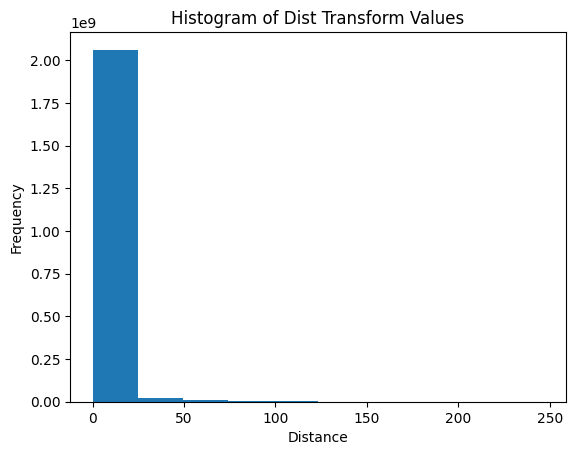

In [9]:
plt.hist(dist_transform.ravel(), bins=10)
plt.title("Histogram of Dist Transform Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

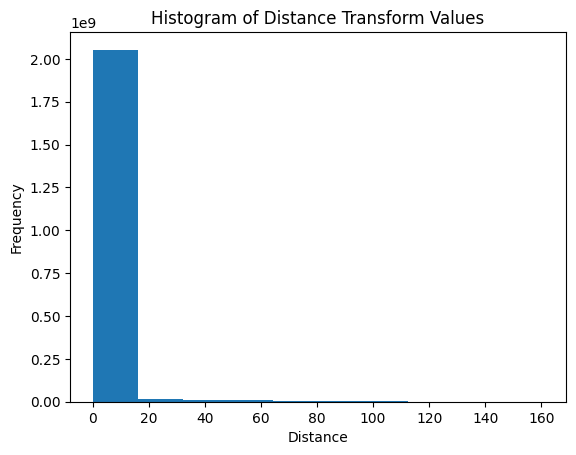

In [10]:
plt.hist(distance_transform.ravel(), bins=10)
plt.title("Histogram of Distance Transform Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

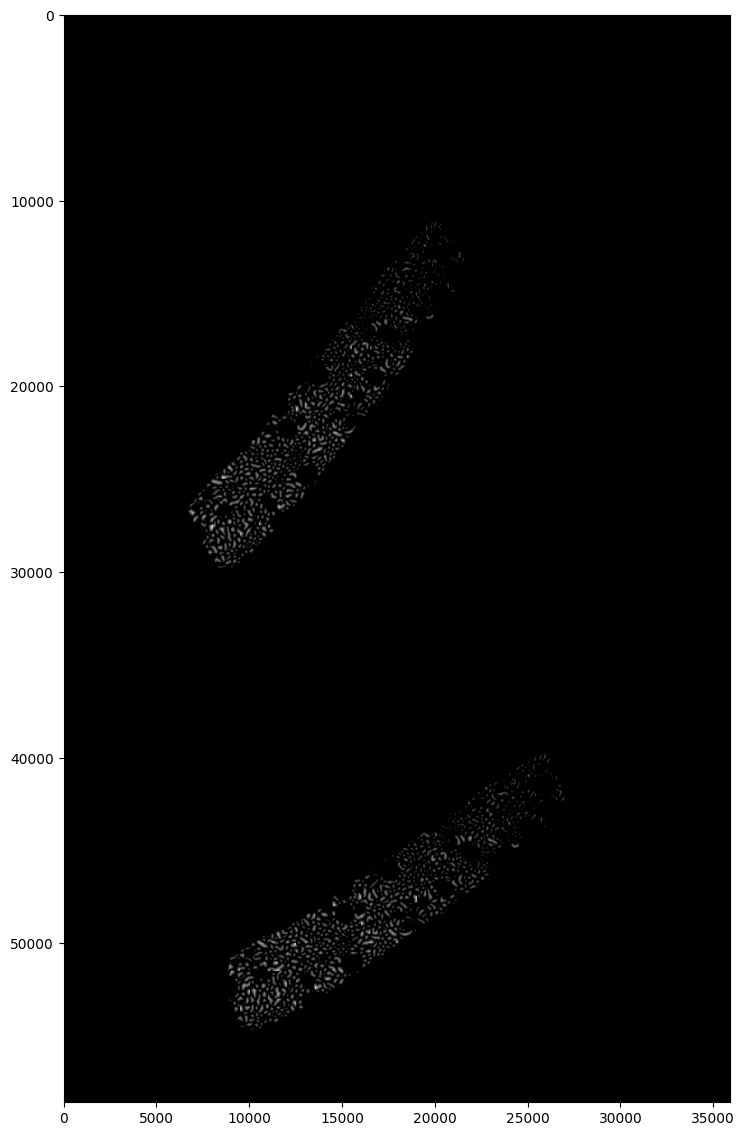

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(48, 48))
plt.subplot(3,1,1)
plt.imshow(dist_transform, cmap = 'gray')
plt.show()

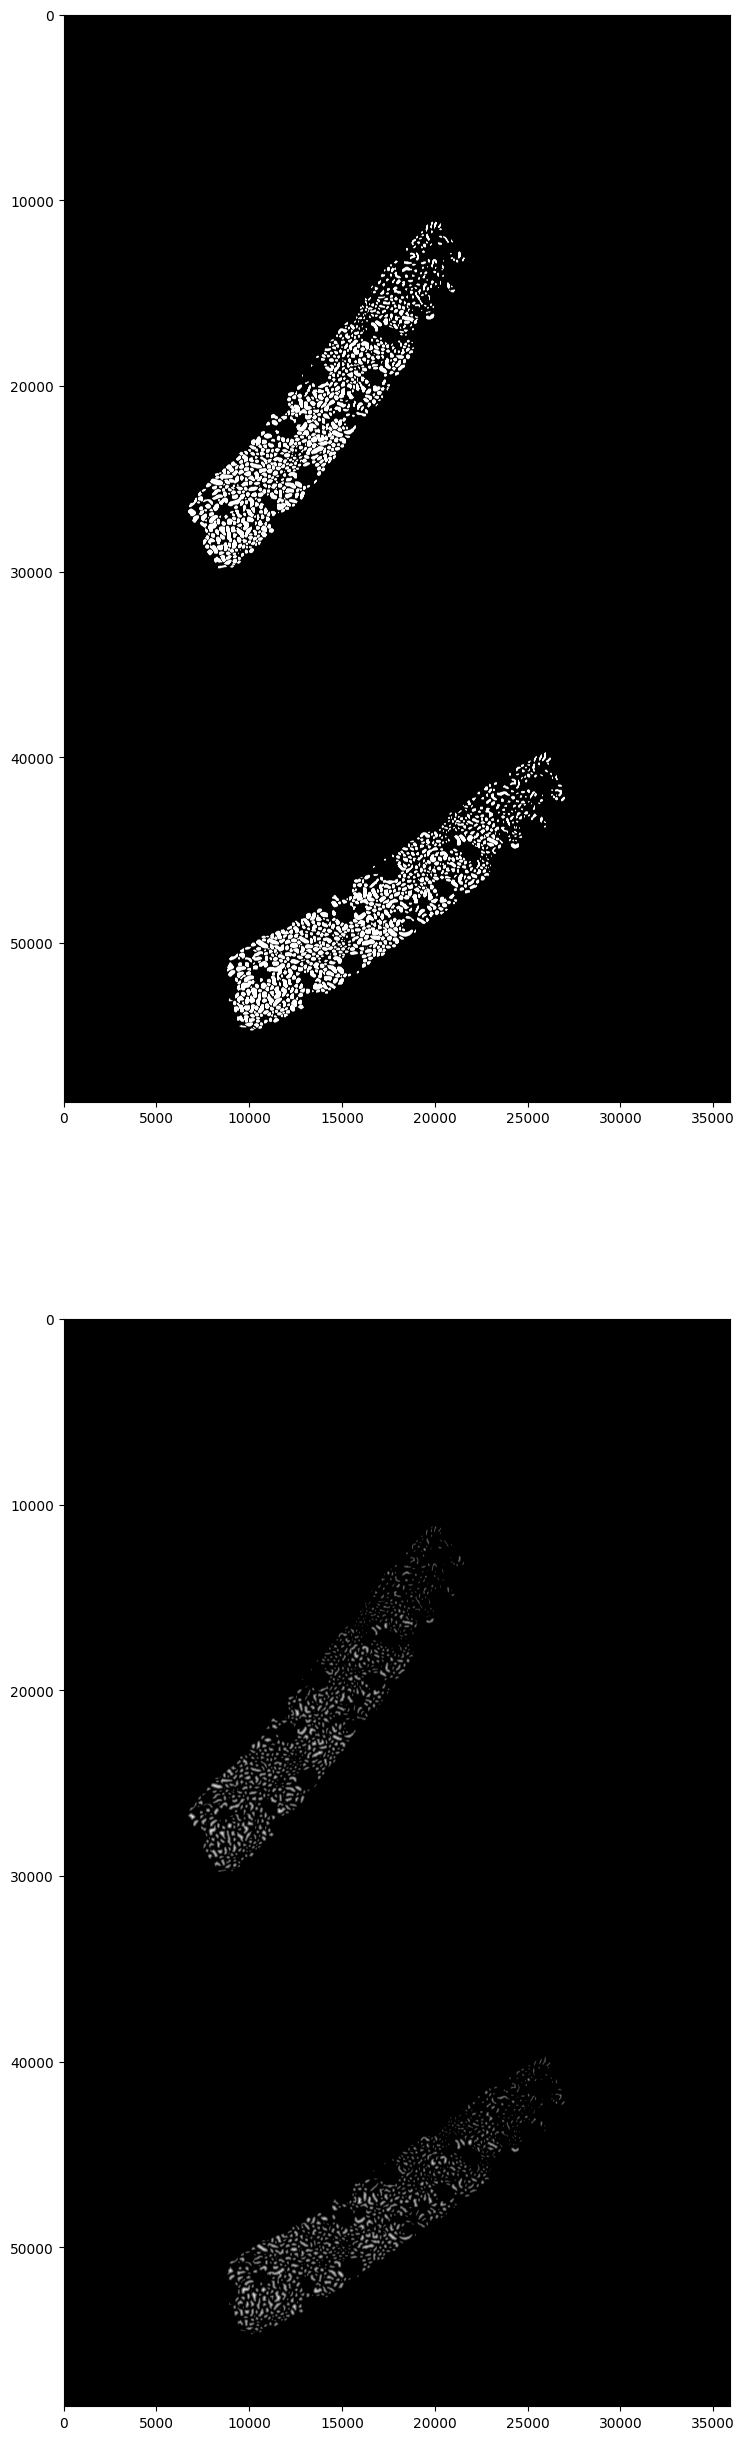

In [9]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(48, 48))
# plt.subplot(3, 1, 1)
plt.figure(figsize=(48, 48))
plt.subplot(3,1,1)
plt.imshow(binary_mask, cmap='gray')
plt.subplot(3,1,2)
plt.imshow(distance_transform, cmap = 'gray')
plt.show()

In [17]:
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/distance_transform_tbm.png', distance_transform)

True

In [5]:
inverse_binary_mask = 255 - binary_mask

In [8]:
inverse_binary_mask.shape

(58561, 35873)

In [20]:
inverse_distance_transform = cv2.distanceTransform(inverse_binary_mask, cv2.DIST_L2, 5)

In [21]:
inverse_distance_transform.shape

(58561, 35873)

In [22]:
np.save('/blue/pinaki.sarder/manojkumargalla/inverse_distance_transform', inverse_distance_transform)

In [6]:
inverse_distance_transform = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/inverse_distance_transform_tbm.npy')

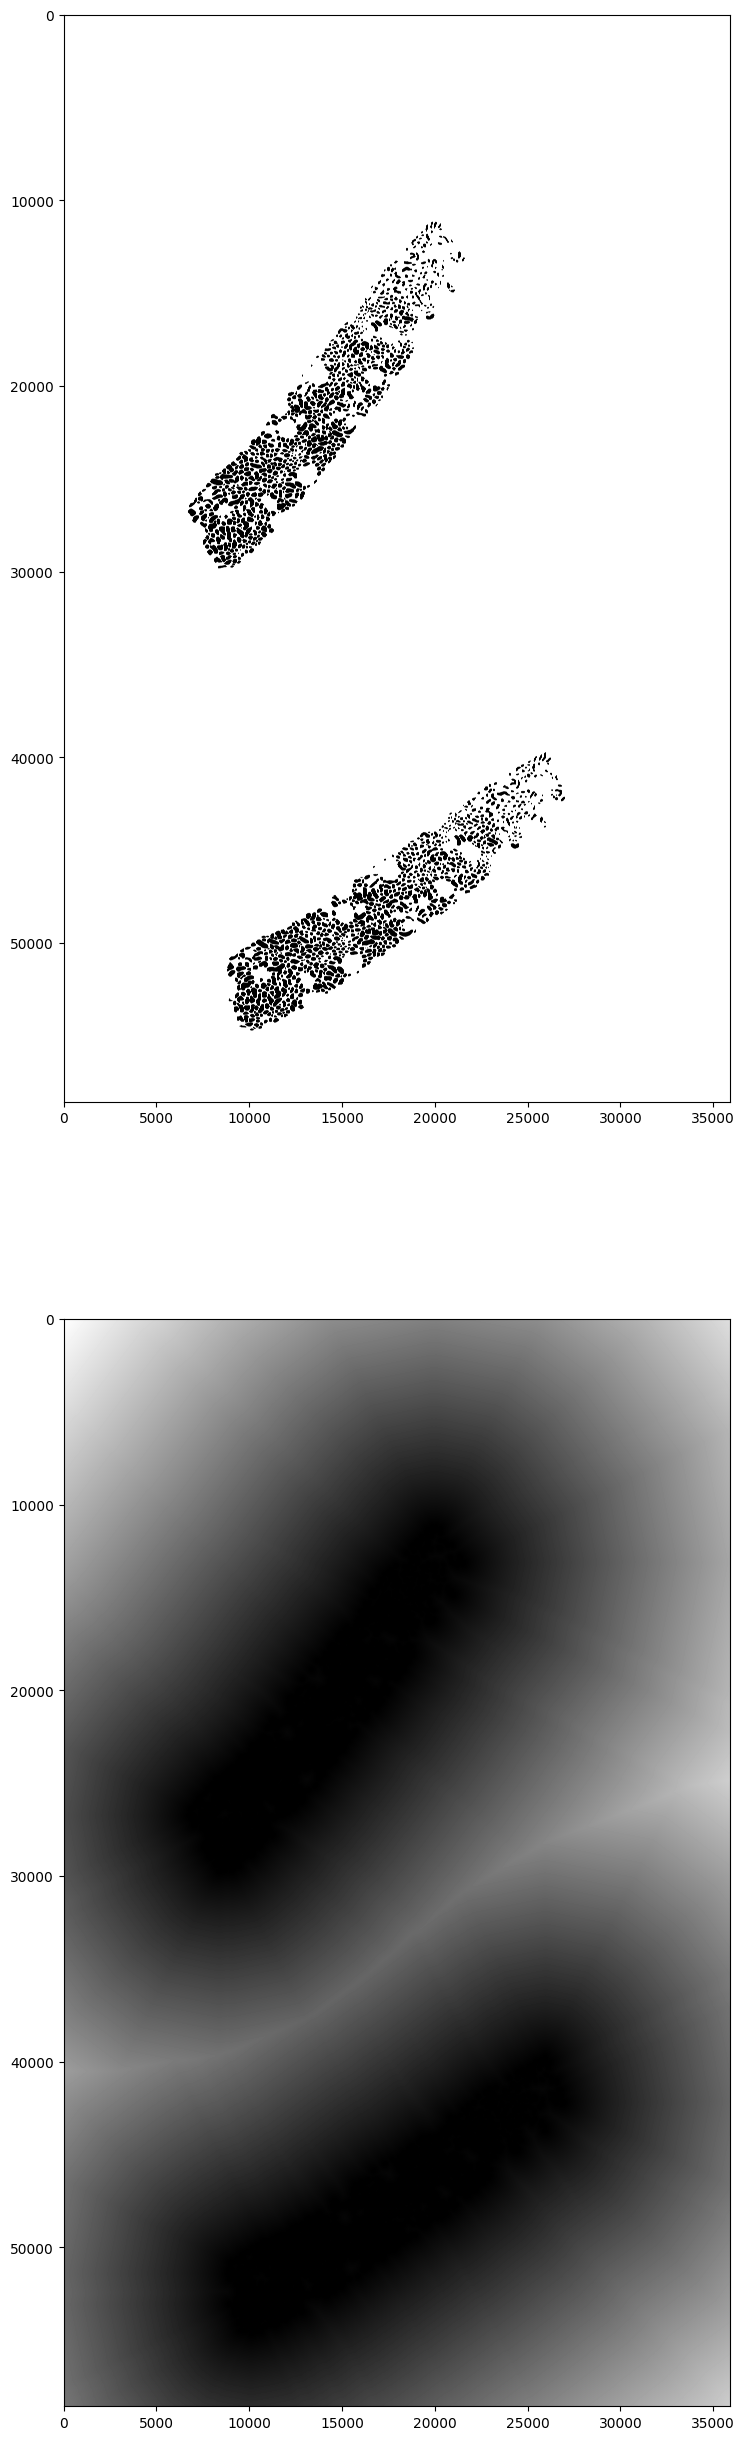

In [28]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(48, 48))
# plt.subplot(3, 1, 1)
plt.figure(figsize=(48, 48))
plt.subplot(3,1,1)
plt.imshow(inverse_binary_mask, cmap='gray')
plt.subplot(3,1,2)
plt.imshow(inverse_distance_transform, cmap = 'gray')
plt.show()

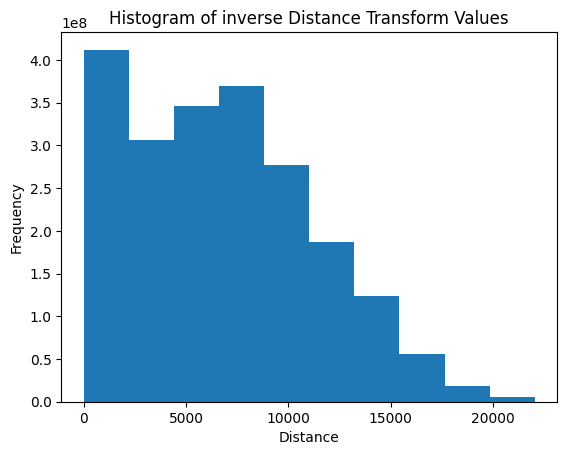

In [29]:
plt.hist(inverse_distance_transform.ravel(), bins=10)
plt.title("Histogram of inverse Distance Transform Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

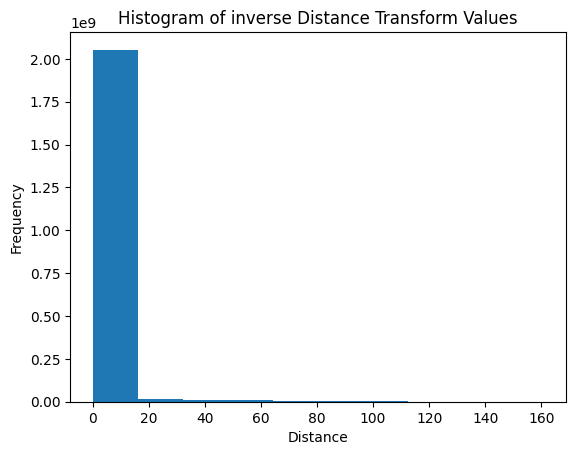

In [30]:
plt.hist(distance_transform.ravel(), bins=10)
plt.title("Histogram of inverse Distance Transform Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [9]:
inverse_distance_transform

array([[22038.264, 22037.467, 22036.67 , ..., 19206.346, 19207.143,
        19207.94 ],
       [22037.66 , 22036.863, 22036.066, ..., 19205.742, 19206.54 ,
        19207.336],
       [22037.057, 22036.26 , 22035.463, ..., 19205.139, 19205.936,
        19206.732],
       ...,
       [10201.856, 10200.856, 10199.856, ..., 17697.264, 17698.06 ,
        17698.857],
       [10202.054, 10201.054, 10200.054, ..., 17697.867, 17698.664,
        17699.46 ],
       [10202.251, 10201.251, 10200.251, ..., 17698.47 , 17699.268,
        17700.064]], dtype=float32)

In [10]:
distance_transform

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
distance_map = distance_transform - inverse_distance_transform

In [8]:
distance_map.shape

(58561, 35873)

In [9]:
np.save('/blue/pinaki.sarder/manojkumargalla/npy_files/distance_map', distance_map)

In [4]:
distance_map = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/distance_map.npy')

In [5]:
distance_map.max()

160.76271

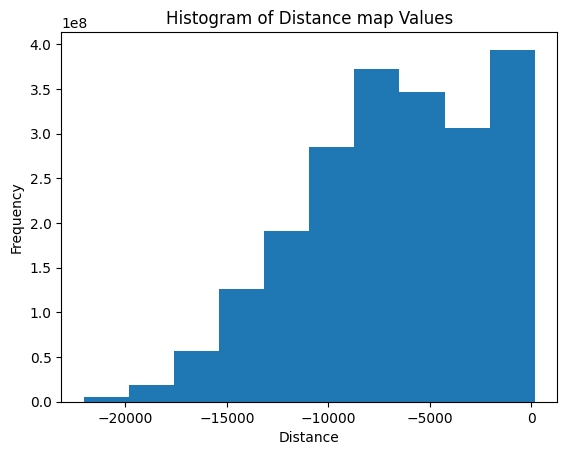

In [11]:
plt.hist(distance_map.ravel(), bins=10)
plt.title("Histogram of Distance map Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

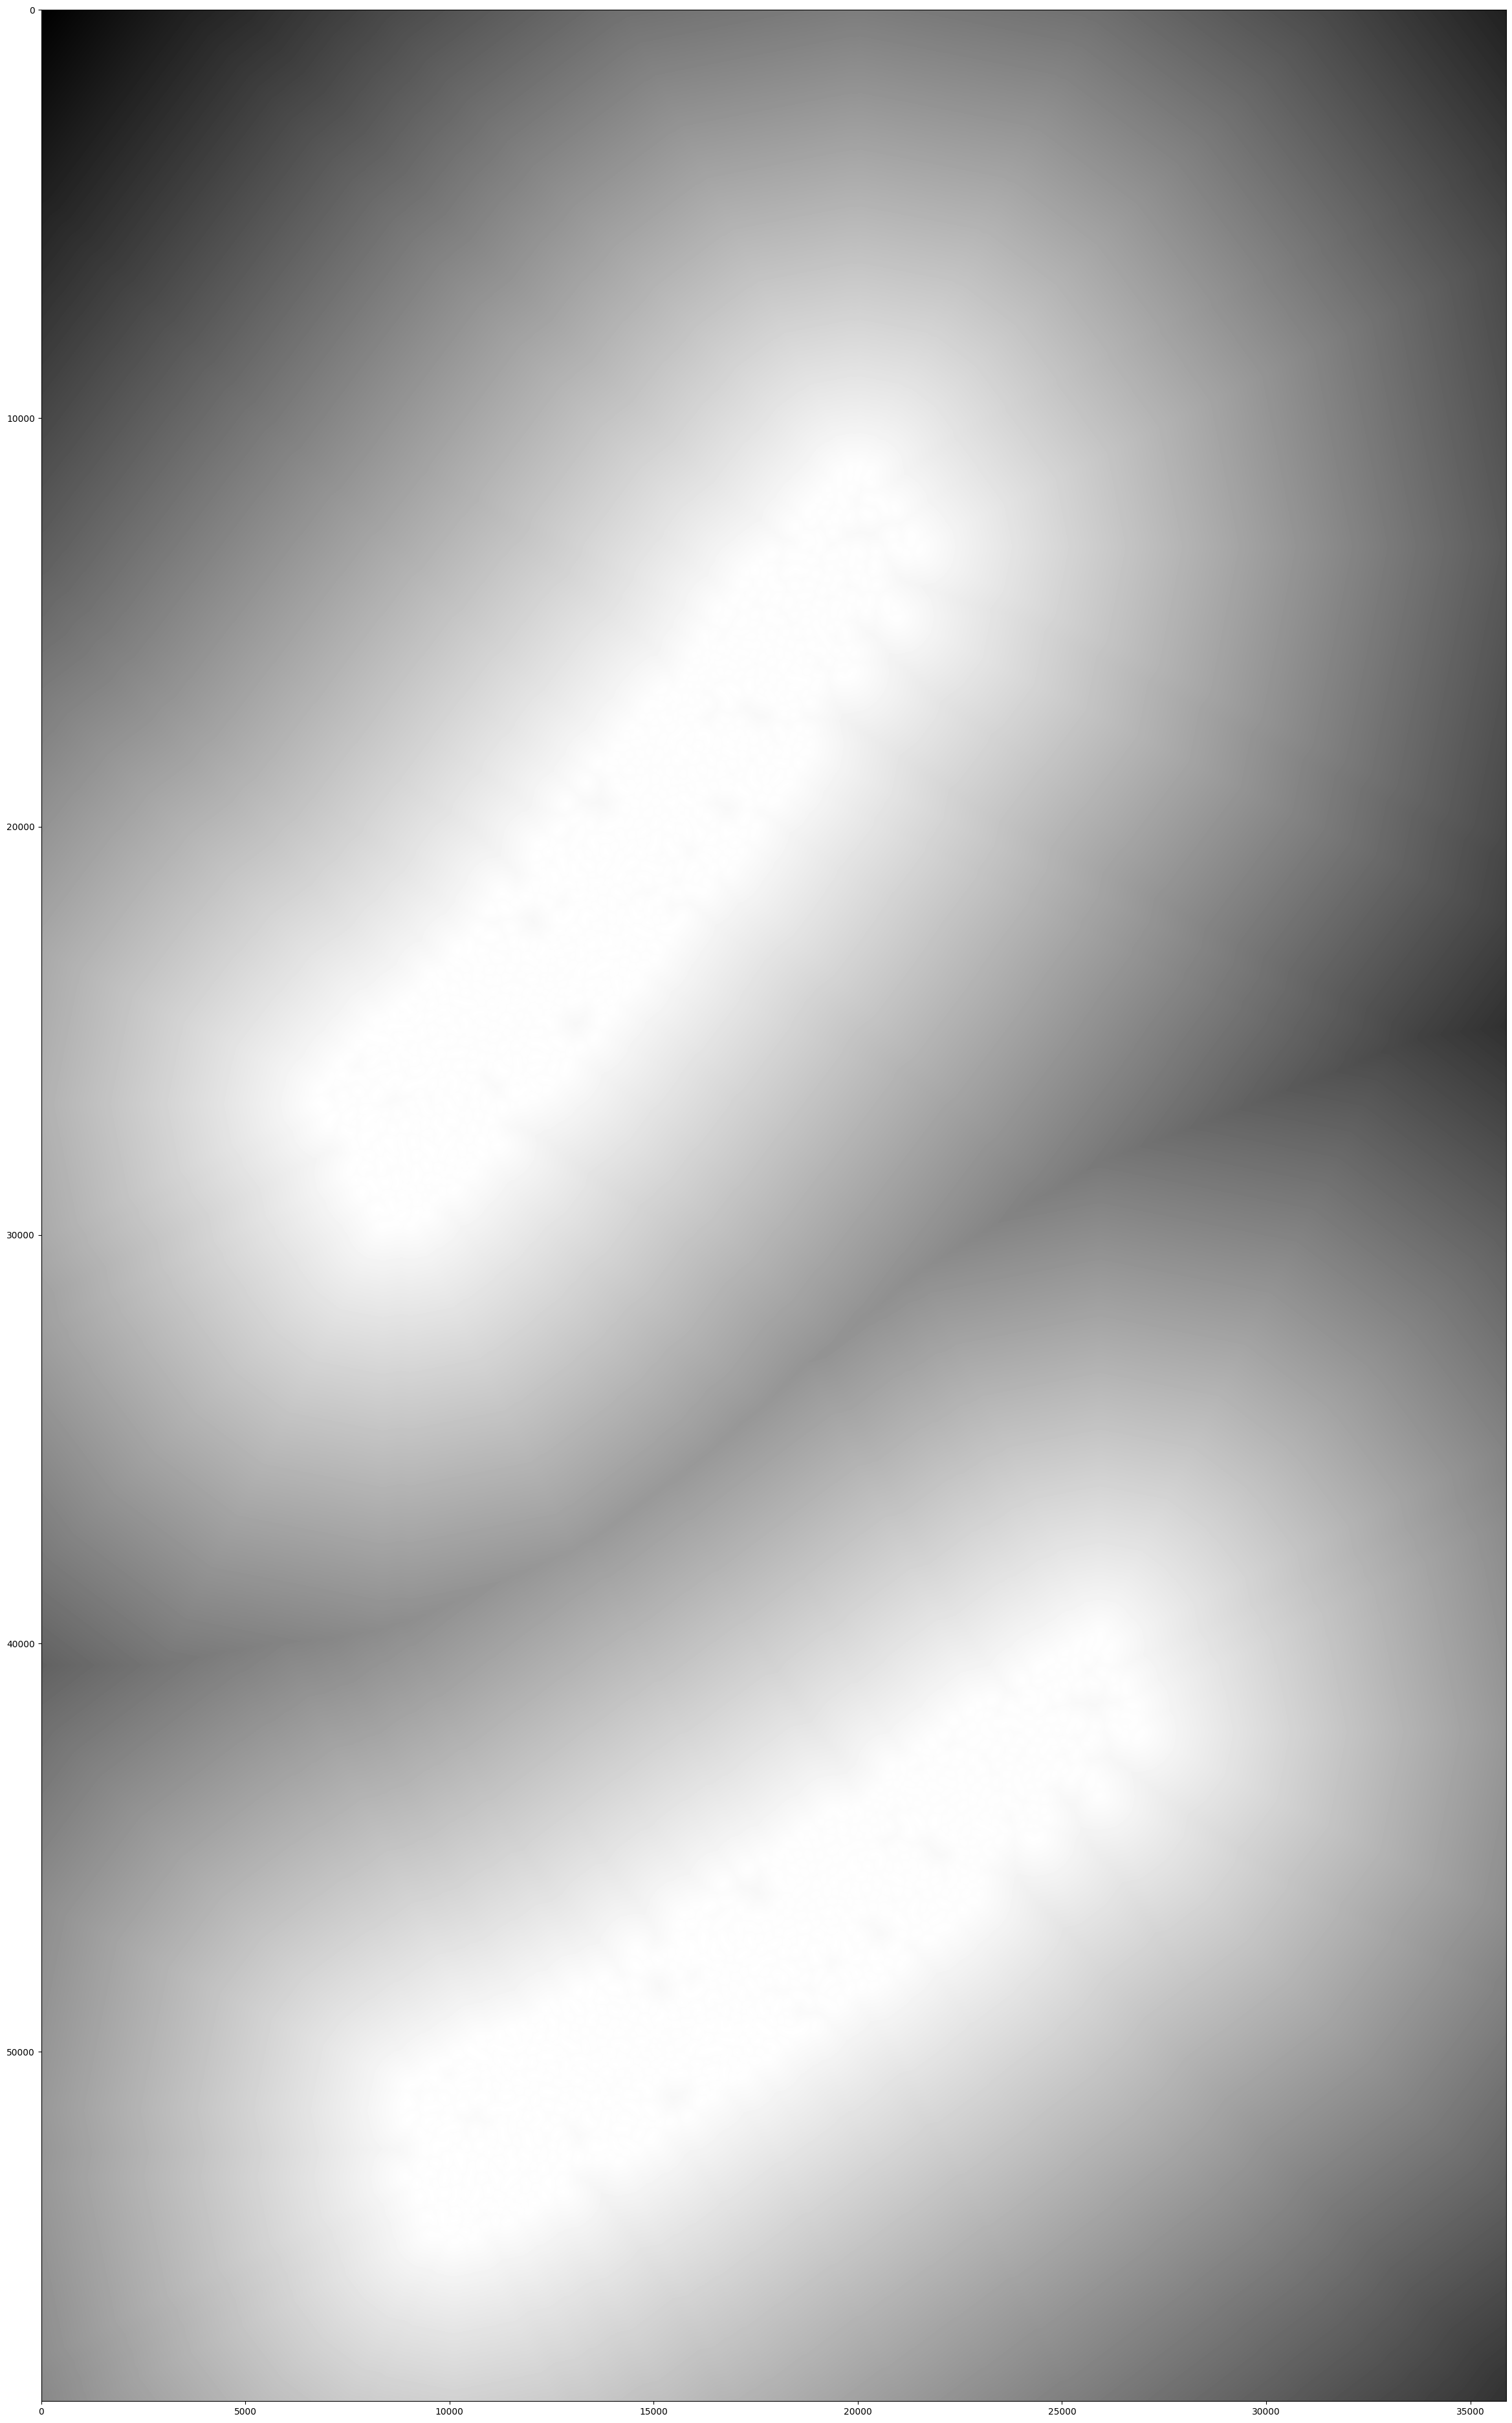

In [18]:
plt.figure(figsize=(48, 48))
# plt.subplot(3,1,1)
plt.imshow(distance_map, cmap='gray')

In [9]:
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/npy_files/distance_map.png', distance_map)

True

In [9]:
(T, threshInv) = cv2.threshold(distance_map, 5, 255, cv2.THRESH_BINARY_INV)

In [8]:
np.save('/blue/pinaki.sarder/manojkumargalla/npy_files/threshInv', threshInv)

In [5]:
threshInv = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/threshInv.npy')

In [7]:
mask = np.abs(distance_map) < 30

# Convert boolean mask to binary (0 and 255)
threshInv = np.where(mask, 255, 0).astype(np.uint8)


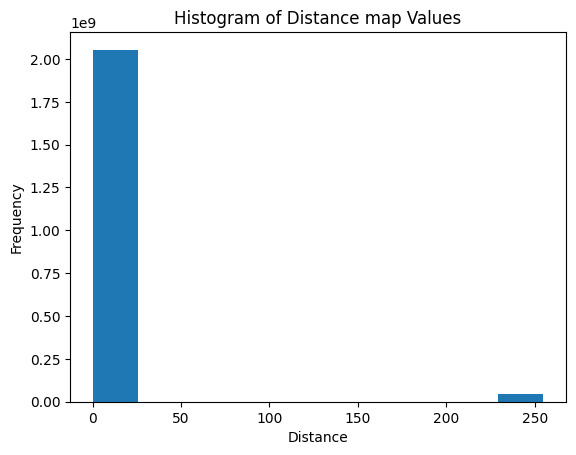

In [17]:
plt.hist(threshInv.ravel(), bins=10)
plt.title("Histogram of Distance map Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

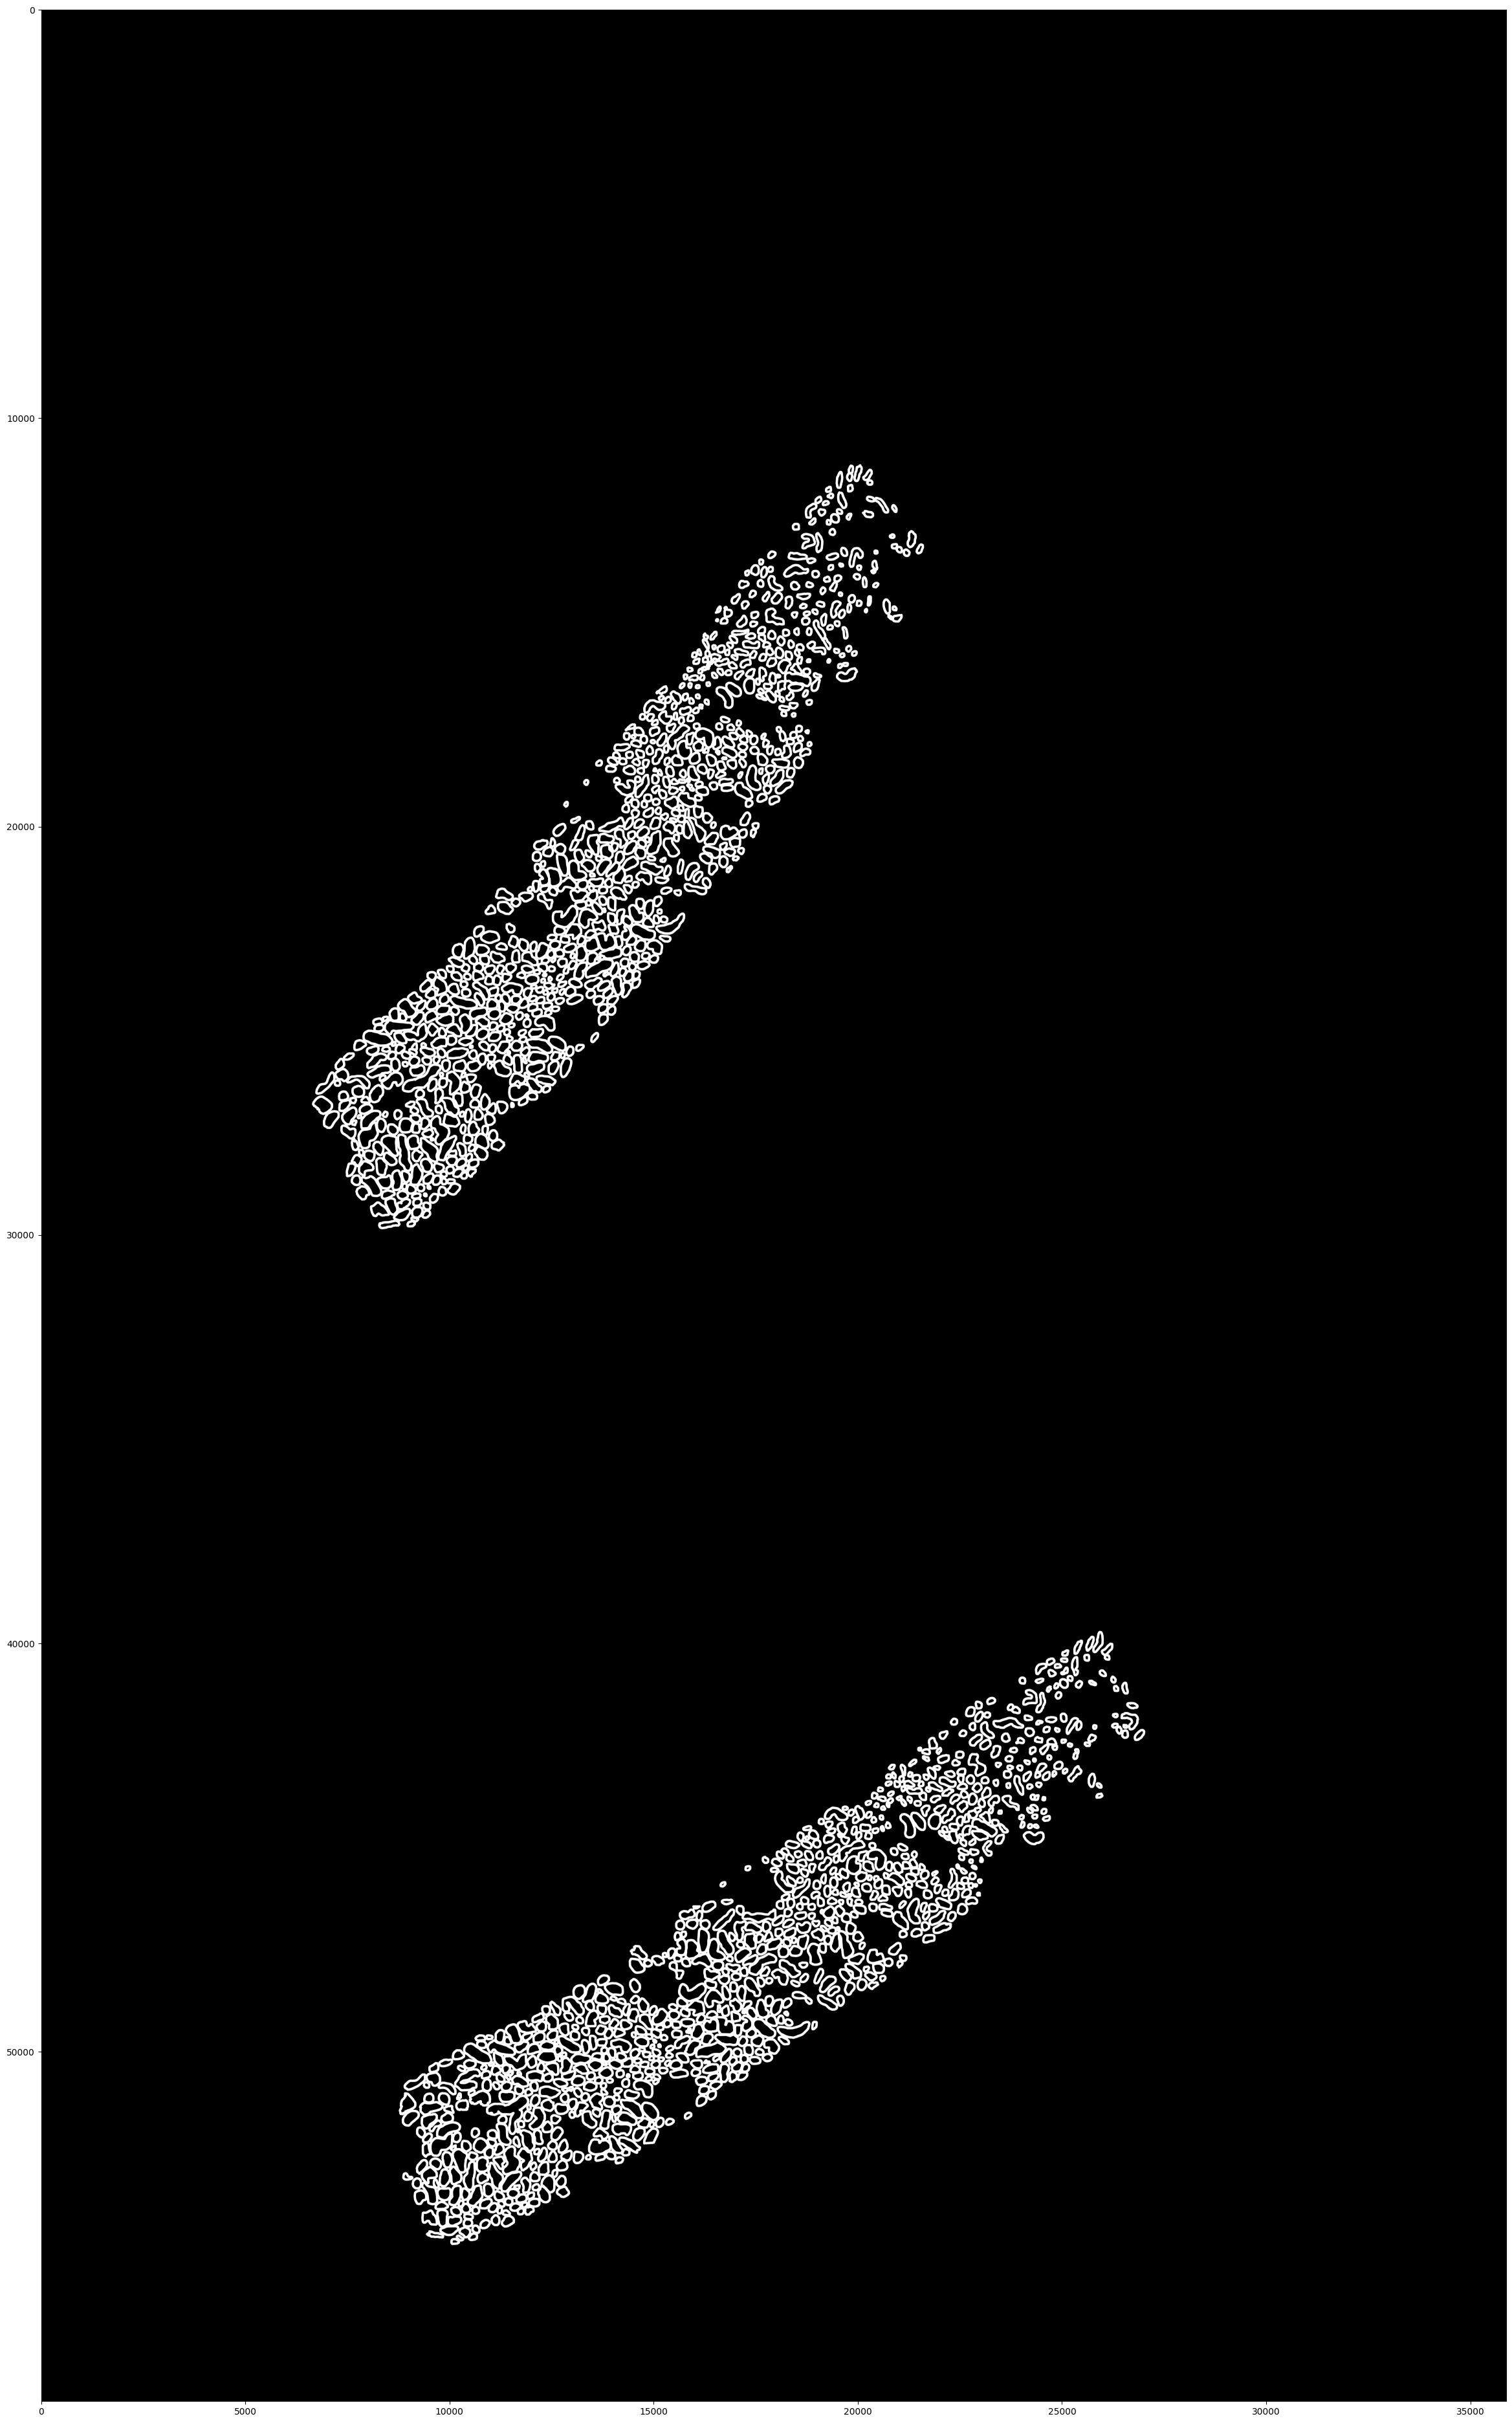

In [6]:
plt.figure(figsize=(48, 48))
# plt.subplot(3,1,1)
plt.imshow(threshInv, cmap='gray')

In [8]:
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/threshold.png', threshInv)

True

In [8]:
# Load the DSA annotations JSON file
with open('/blue/pinaki.sarder/manojkumargalla/tbms.json') as f:
    annotations = json.load(f)

# Load the WSI file
slide = tiffslide.open_slide('/home/manojkumargalla/ResUNet/data/main_images/32-2_PAS_1of2.svs')

print('Slide Opened!')
# Get the dimensions of the WSI
dimensions = slide.dimensions
width, height = dimensions

# Create a blank binary mask with the same dimensions as the WSI
binary_mask_of_tbms = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the contours on the mask
for element in annotations['annotation']['elements']:
    if element['type'] == 'polyline':
        points = element['points']
        # print(len(points[0]))
        if element['closed'] and len(points) > 0 and len(points[0]) == 3:
            points = np.array(points, dtype=np.int32)
            # Ensure the points are in the correct shape (N, 1, 2)
            points = np.array([[p[0], p[1]] for p in points], dtype=np.int32)
            points = points.reshape((-1, 1, 2))
            contours = [points]
            cv2.drawContours(binary_mask_of_tbms, contours, -1, color=255, thickness=cv2.FILLED)  # Draw the filled contour

# Save the binary mask as an image
print('Saving Image ')
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/binary_mask_of_tbms.png', binary_mask_of_tbms)

# Close the slide
slide.close()

Slide Opened!
Saving Image 


In [12]:
np.save('/blue/pinaki.sarder/manojkumargalla/npy_files/binary_mask_of_tbms', binary_mask_of_tbms)

In [7]:
binary_mask_of_tbms = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/binary_mask_of_tbms.npy')

In [8]:
product = threshInv * binary_mask_of_tbms

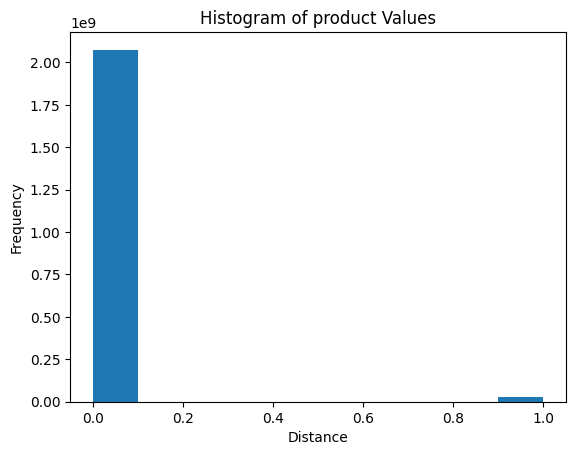

In [26]:
plt.hist(product.ravel(), bins=10)
plt.title("Histogram of product Values")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [9]:
np.save('/blue/pinaki.sarder/manojkumargalla/npy_files/product', product)

In [5]:
product = np.load('/blue/pinaki.sarder/manojkumargalla/npy_files/product.npy')

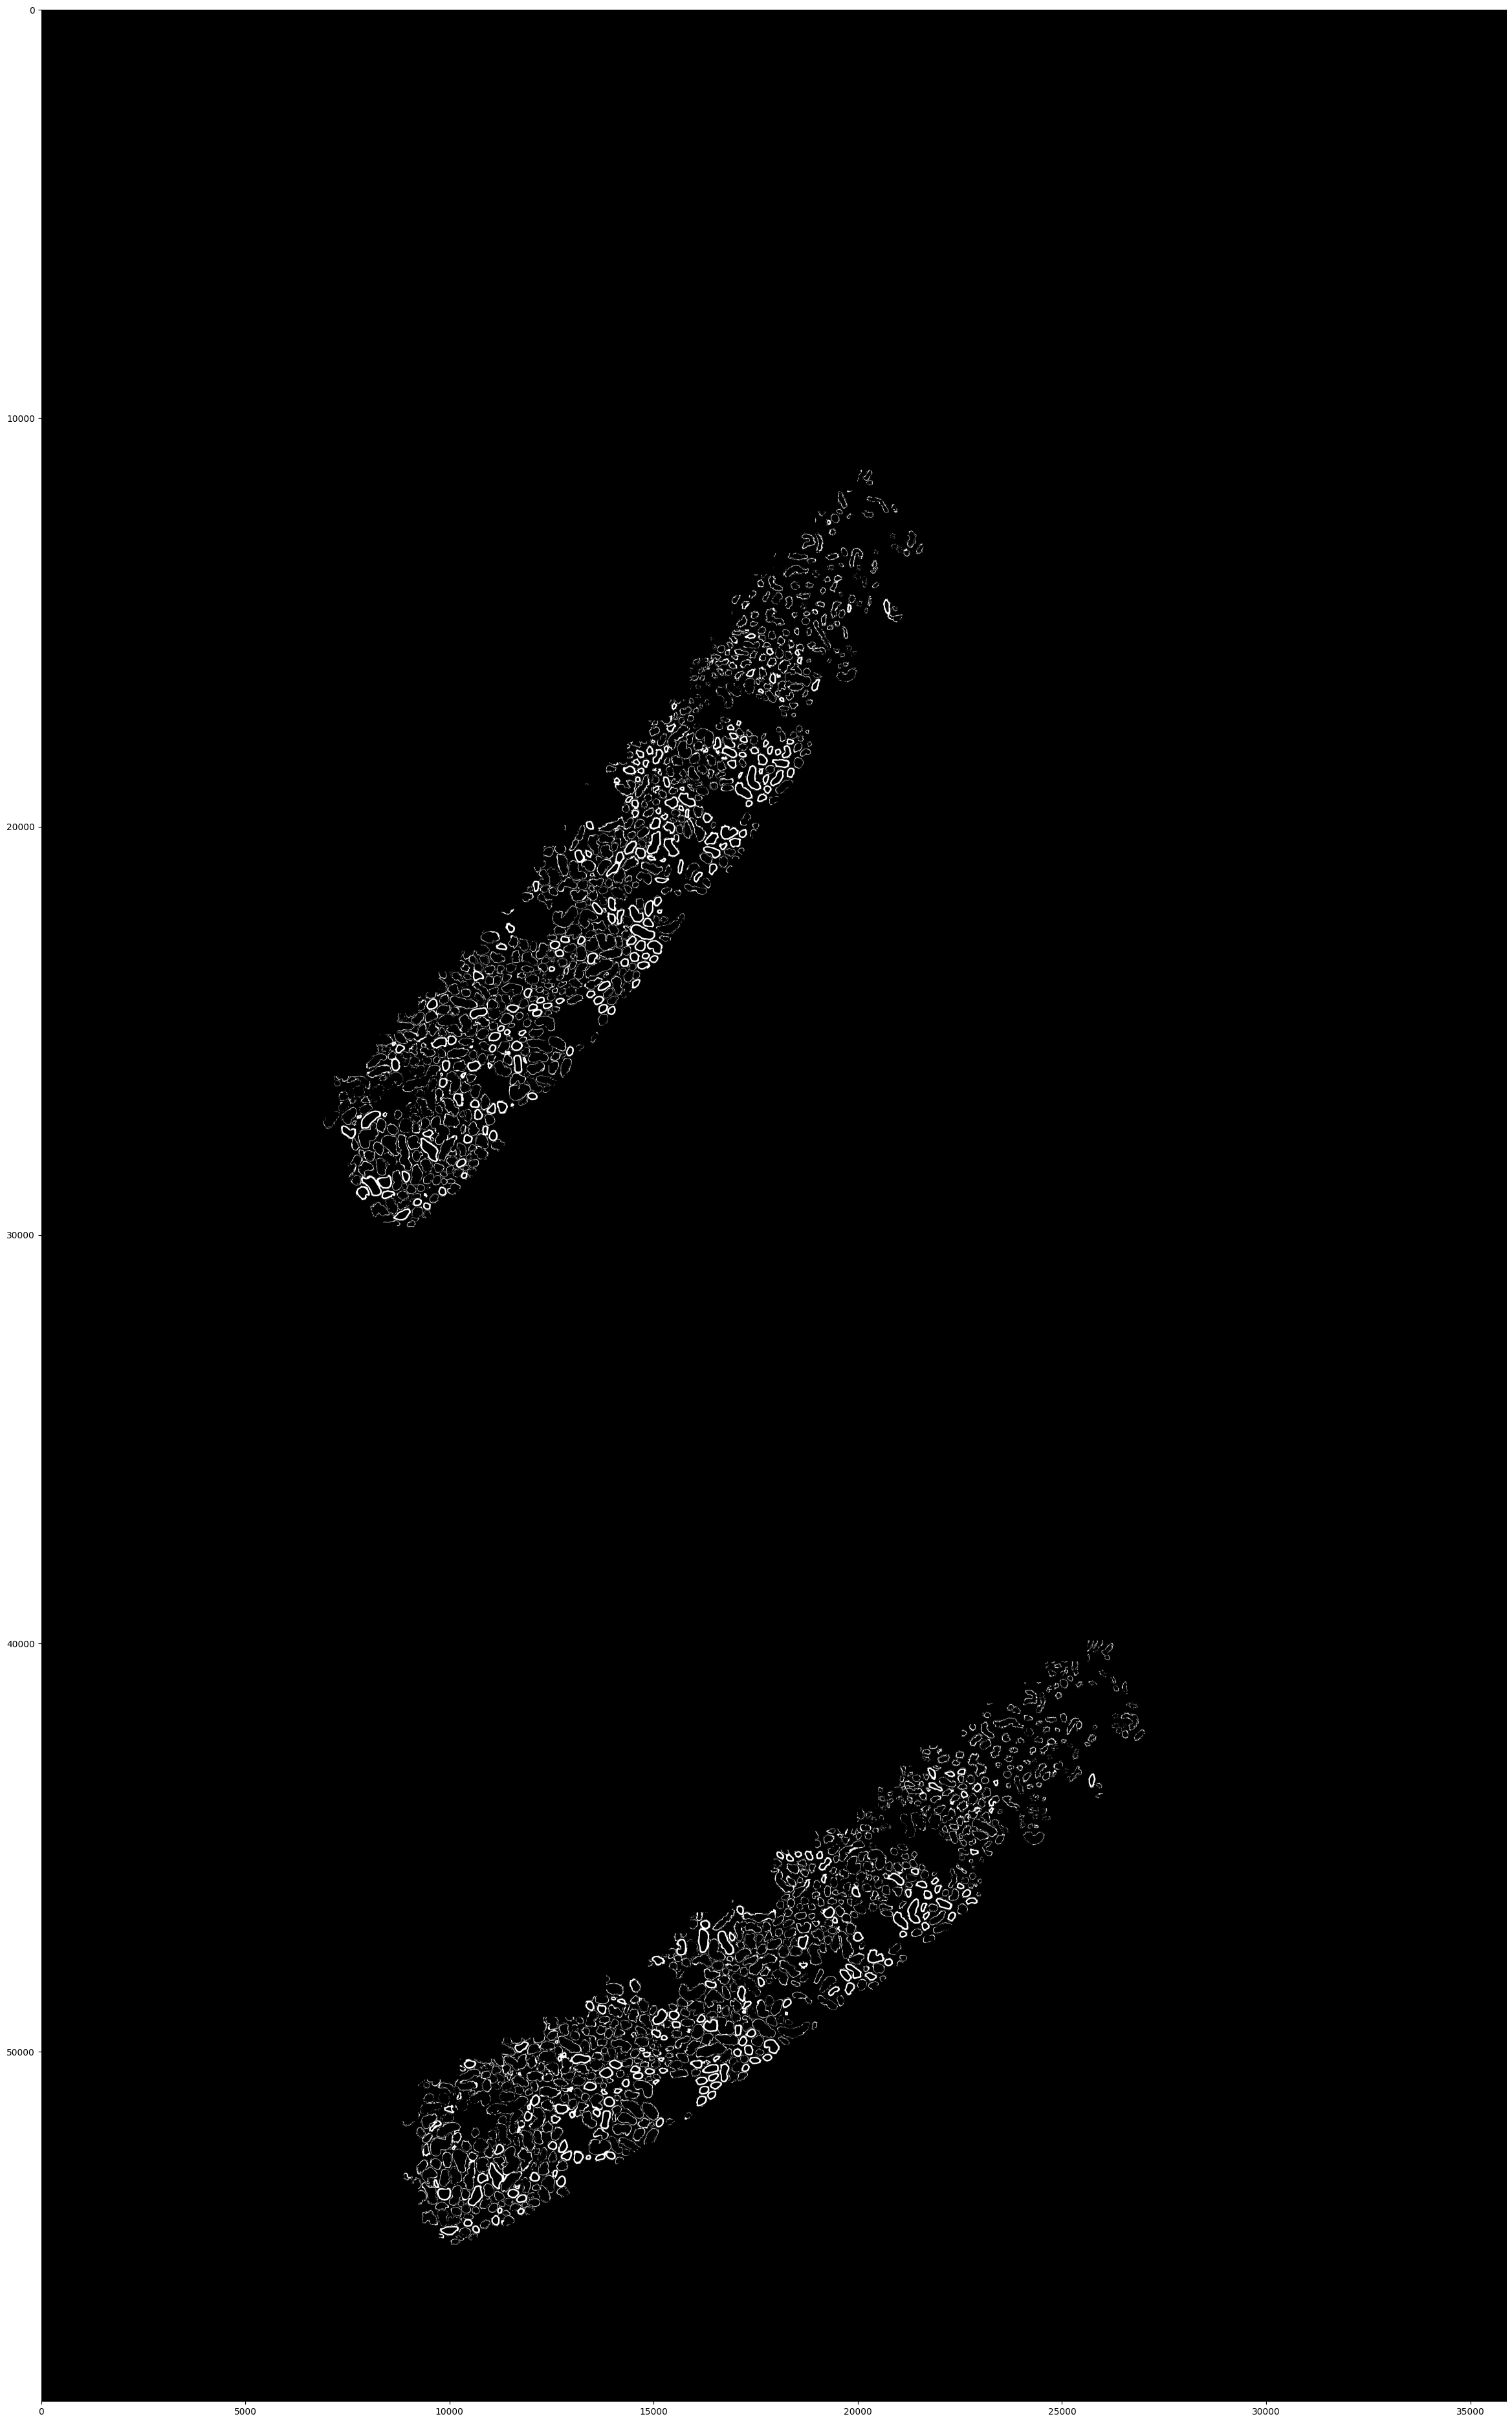

In [15]:
plt.figure(figsize=(48, 48))
# plt.subplot(3,1,1)
plt.imshow(product, cmap='gray')

In [26]:
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/filtered_image.png', 255*product)

True

In [ ]:
img = cv2.imread('/blue/pinaki.sarder/manojkumargalla/filtered.png')
cv2.imshow('Image', img)

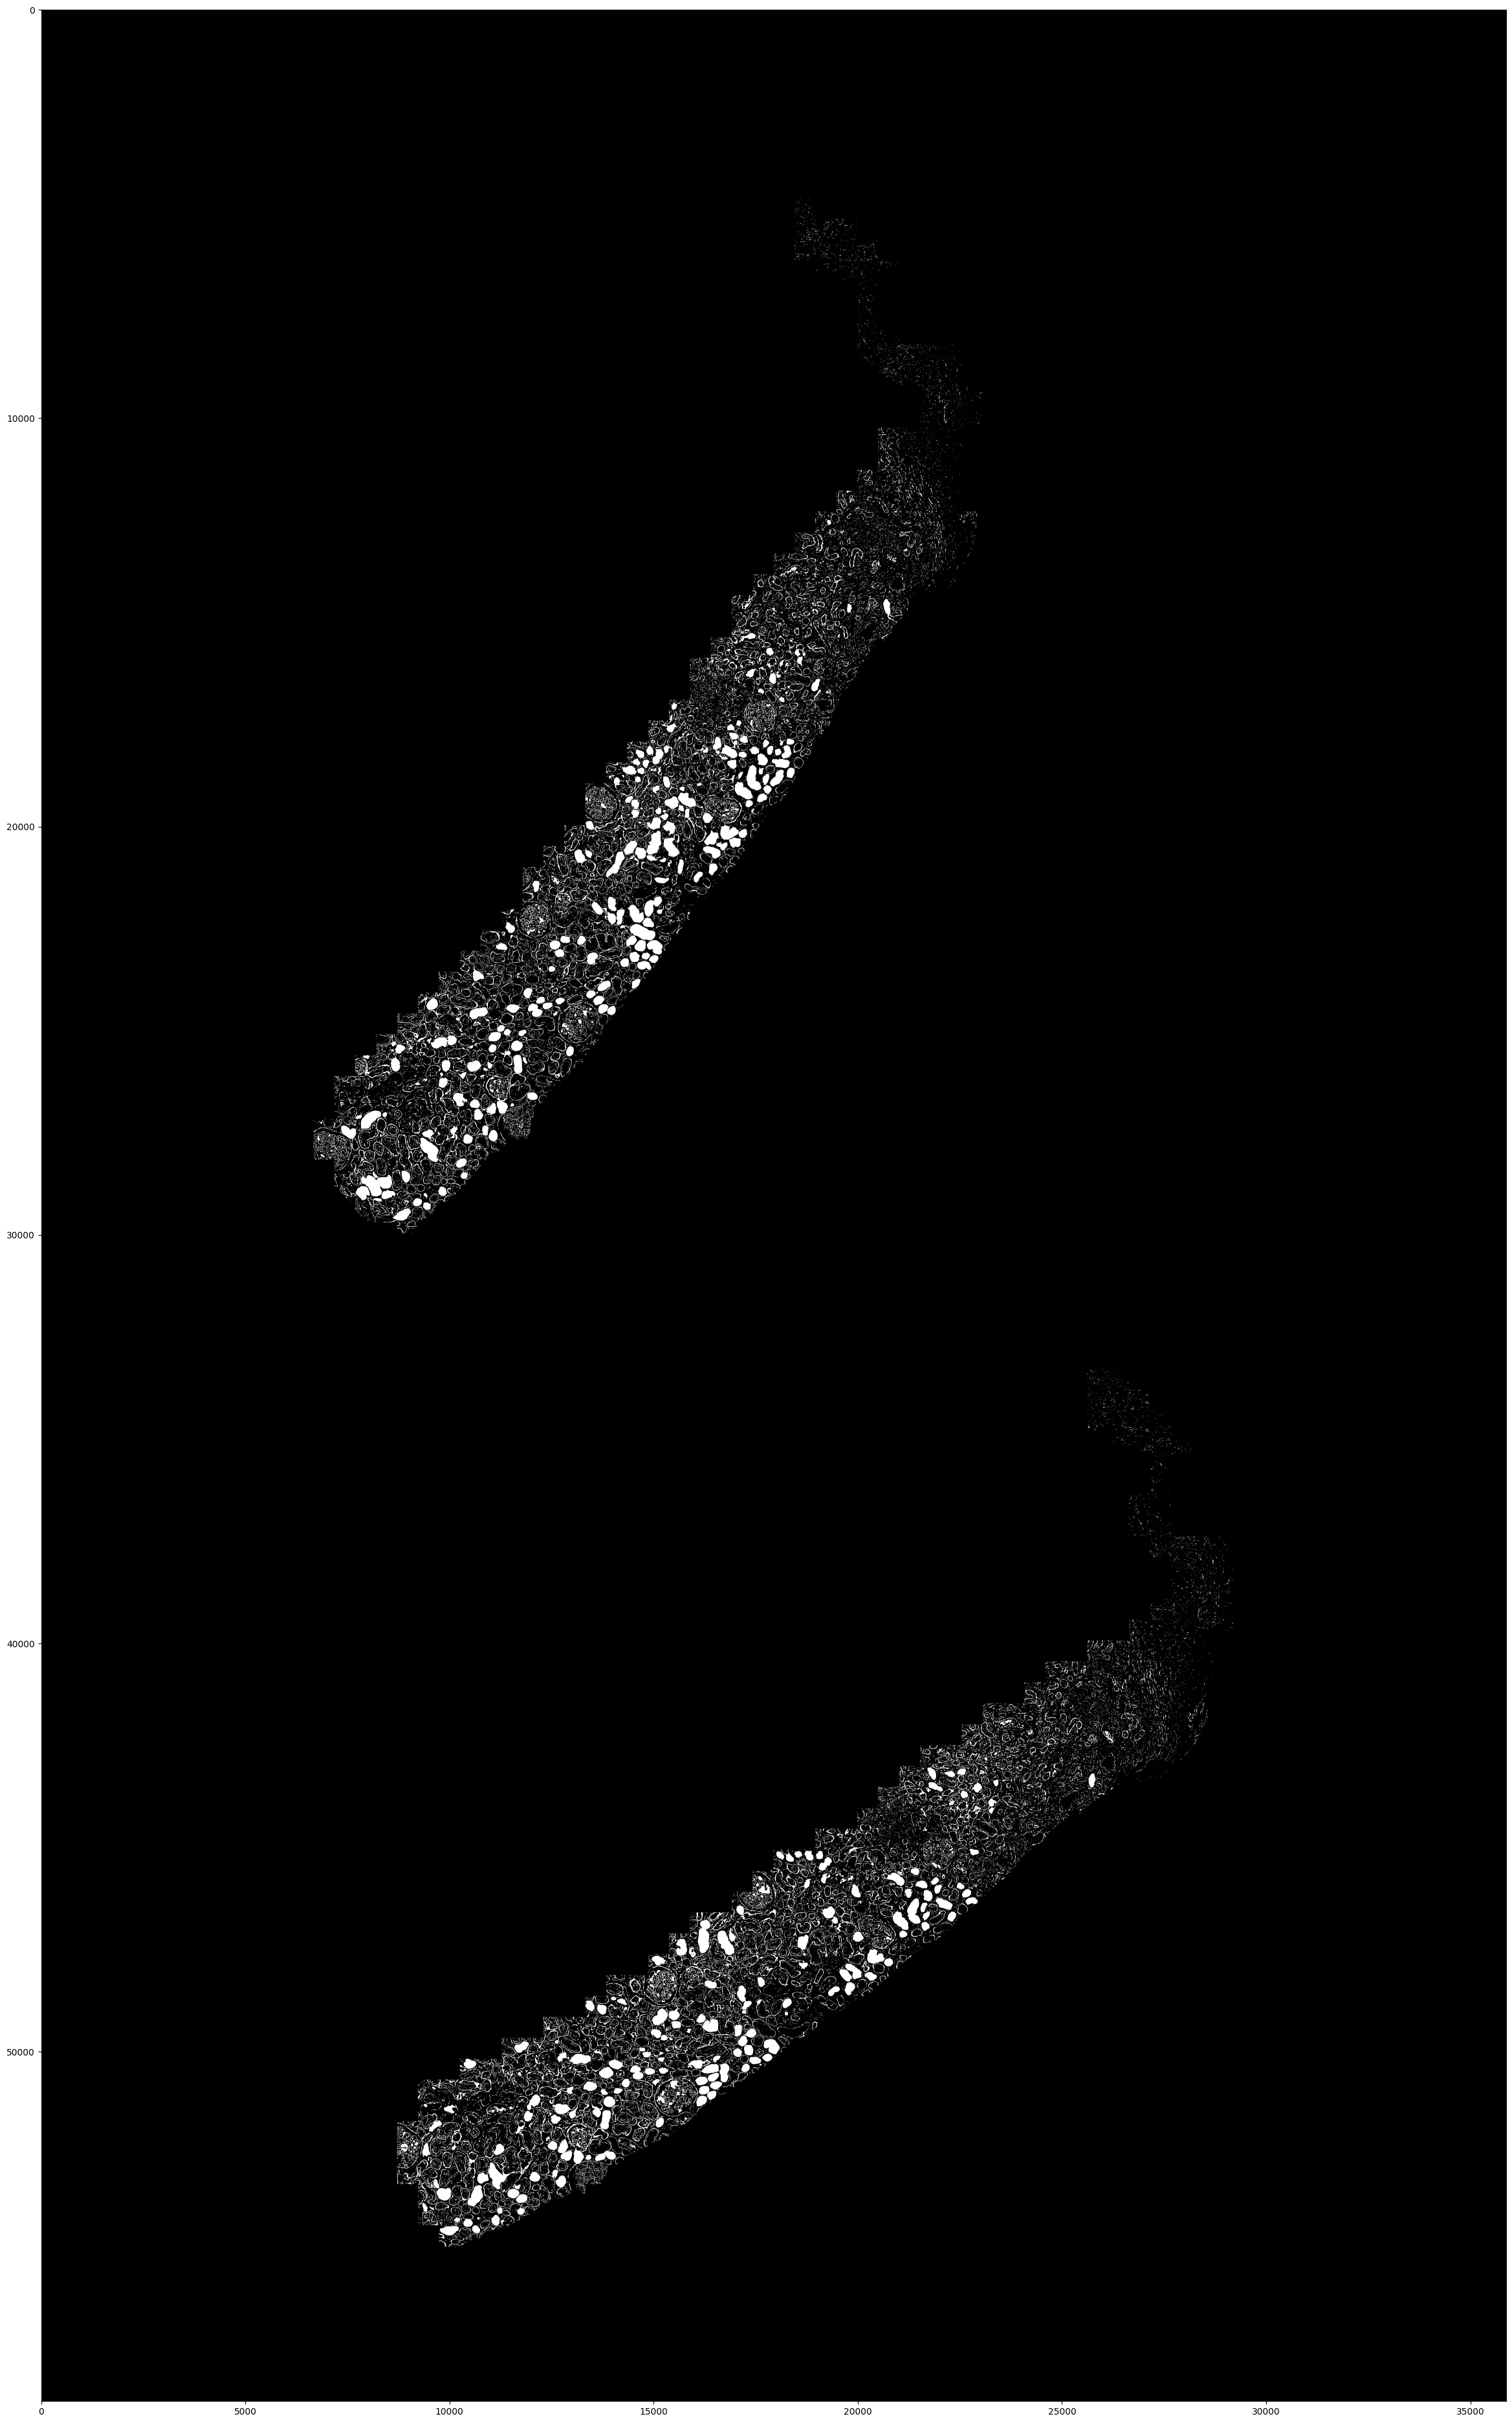

In [17]:
plt.figure(figsize=(48, 48))
# plt.subplot(3,1,1)
plt.imshow(binary_mask_of_tbms, cmap='gray')

In [21]:
final_filtered = binary_mask*product

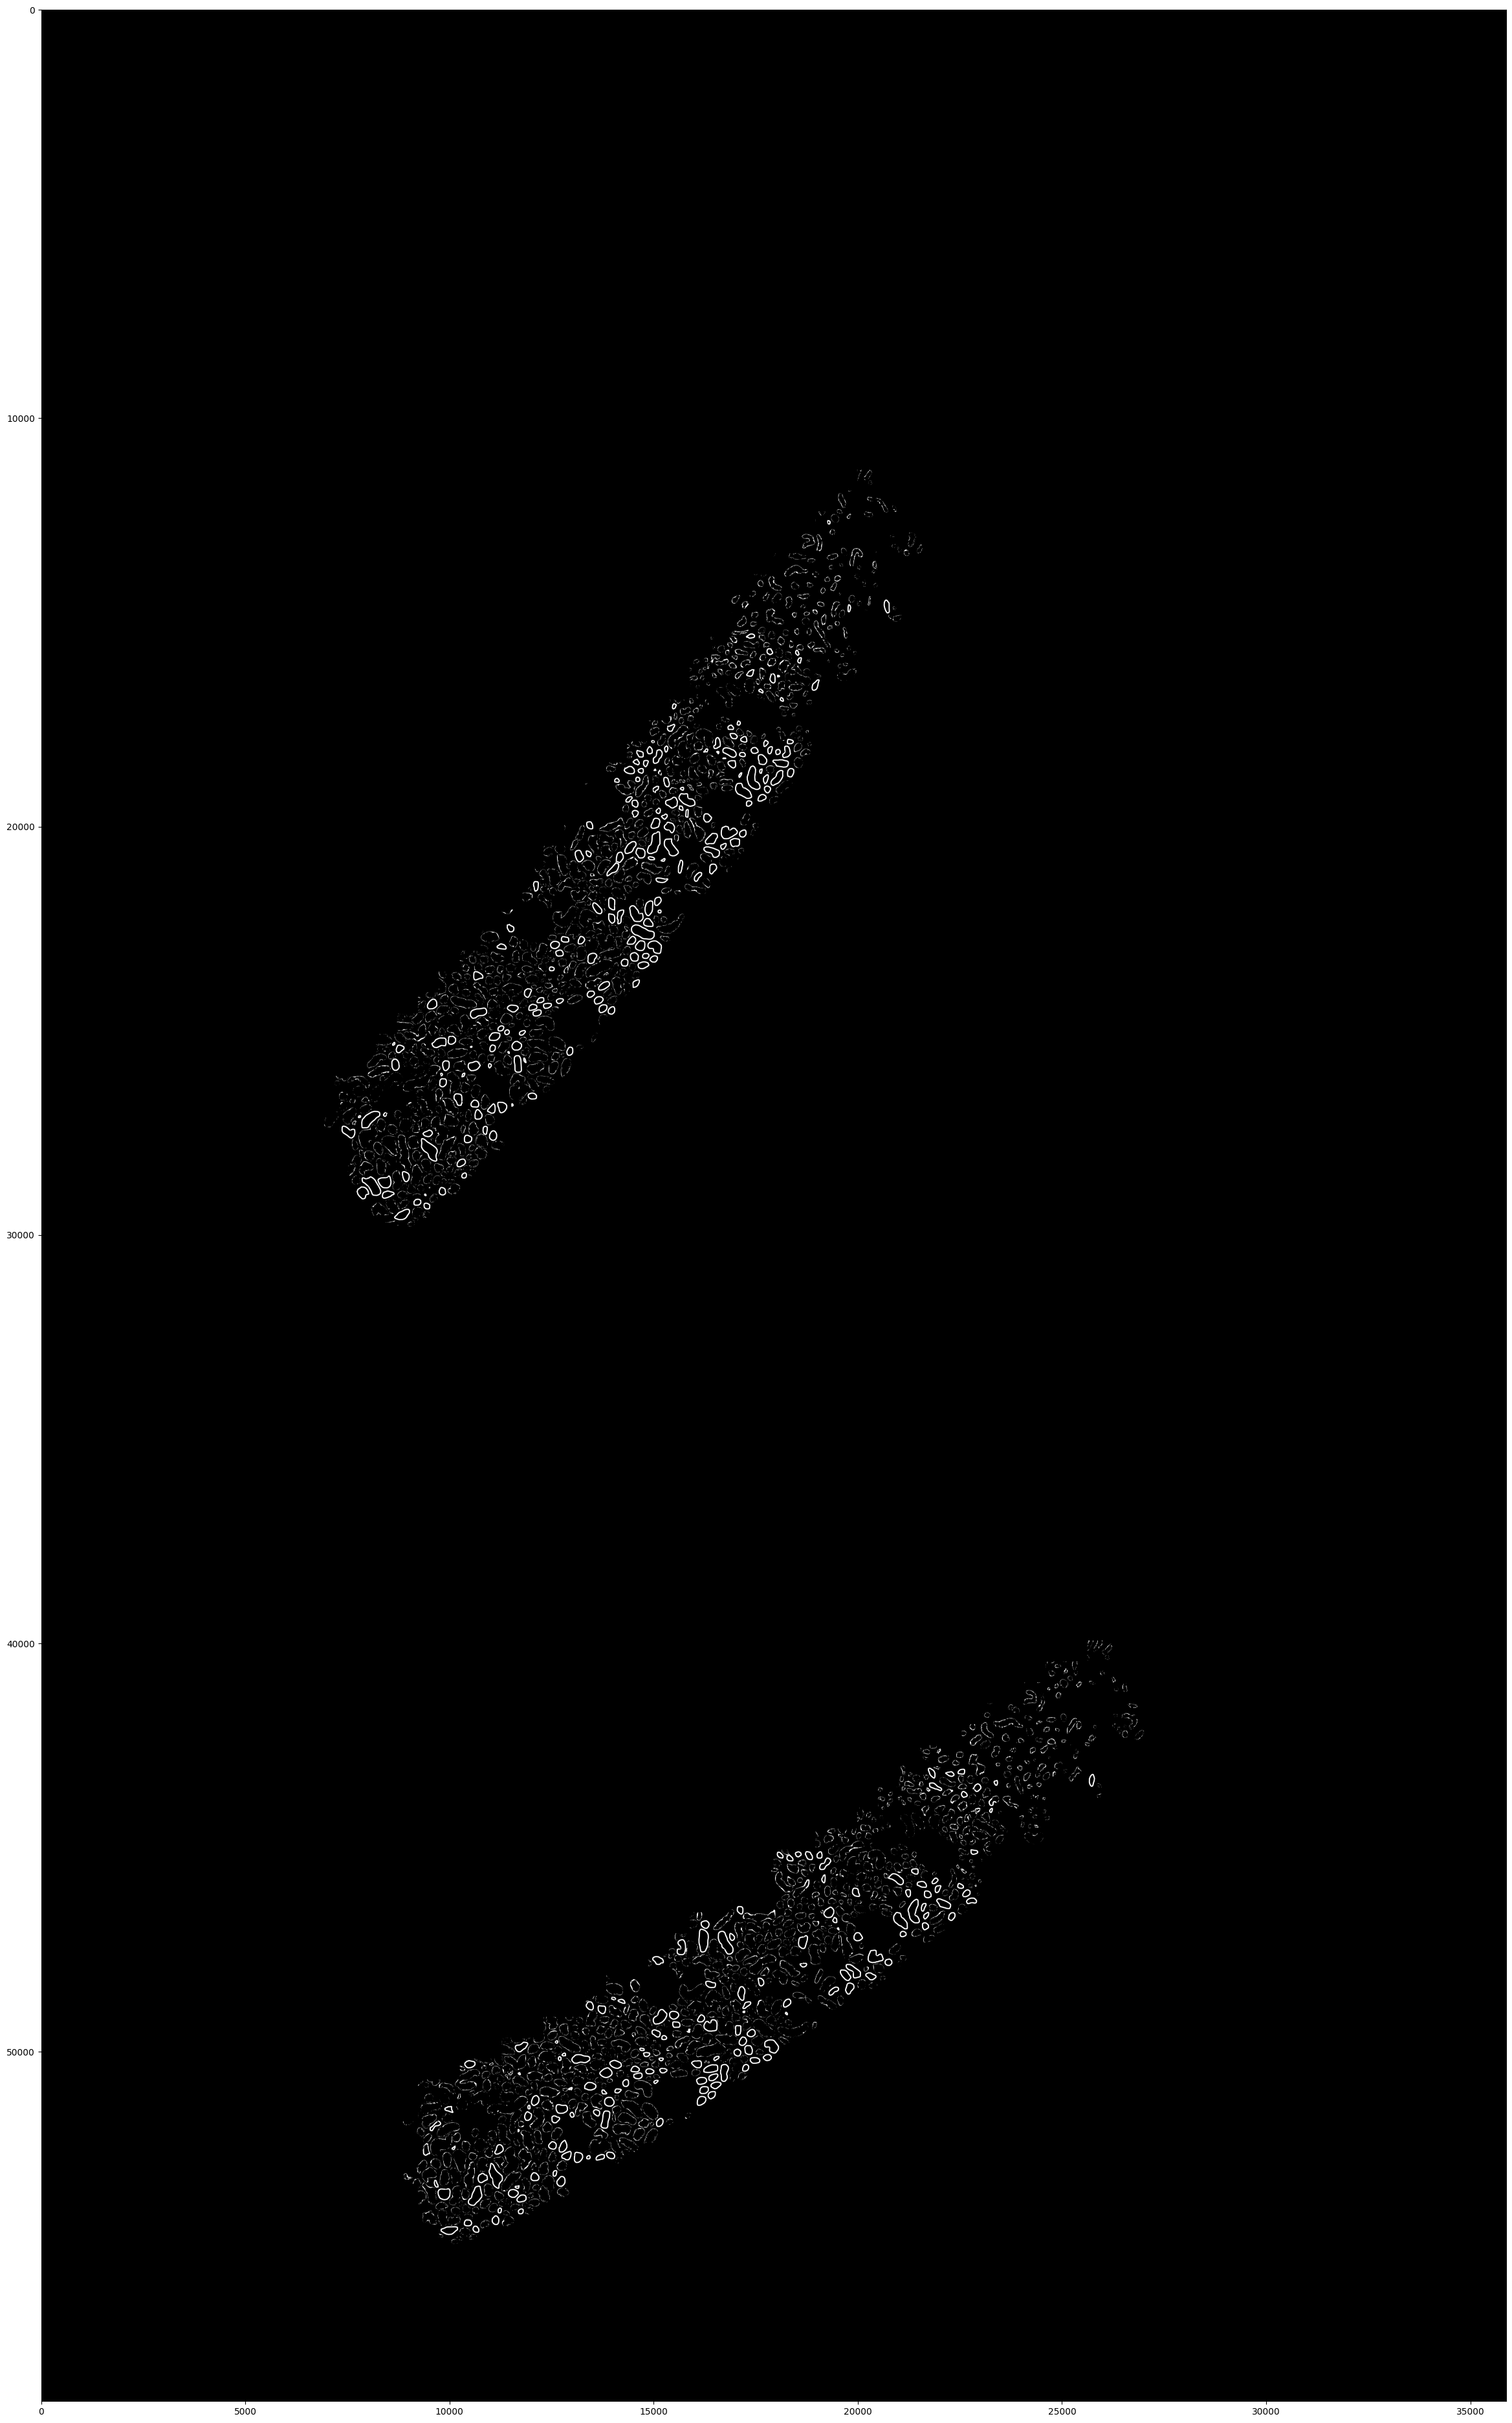

In [23]:
plt.figure(figsize=(48, 48))
# plt.subplot(3,1,1)
plt.imshow(final_filtered, cmap='gray')

In [13]:
np.all(product == 0)

False

In [15]:
cv2.imwrite('/blue/pinaki.sarder/manojkumargalla/final_filtered.png', result_mask)

True

In [14]:
# tubules_mask = threshInv.copy()
membrane_mask = product.copy()
kernel = np.ones((3, 3), np.uint8)

# Apply opening (erosion followed by dilation) to the membrane mask to remove noise
cleaned_membrane_mask = cv2.morphologyEx(membrane_mask, cv2.MORPH_OPEN, kernel)

# Combine the cleaned membrane mask with the tubules mask
result_mask = np.where(binary_mask == 1, 0, cleaned_membrane_mask)

In [22]:
np.array_equal(final_filtered, product)

False

In [ ]:
plt.imsave('dist_transform.png', distance_transform, cmap='gray')

In [ ]:
inverse_distance_transform = np.where(distance_transform > 0, 1.0 / distance_transform, np.inf)

In [ ]:
inverse_distance_transform = np.where(np.isinf(inverse_distance_transform), 1000, inverse_distance_transform)

In [ ]:
# inverse_resized = inverse_distance_transform.resize(7680,7680)
resized_array = cv2.resize(inverse_distance_transform, (7680, 7680))

In [ ]:
resized_array.shape

In [ ]:
inverse_distance_transform.shape

In [ ]:
plt.figure(figsize=(48, 48))
plt.subplot(3,1,1)
plt.imshow(np.real(resized_array), cmap='gray')

In [27]:
product.shape

(58561, 35873)